In [1]:
%matplotlib inline
%env KERAS_BACKEND=tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# from ipywidgets import interact
from ipywidgets import interact_manual

# import sympy as sym
# from sympy import S,N
# import locale
# from sklearn.linear_model import LinearRegression

from keras.utils import np_utils #one hot encoding
from keras.models import Sequential #神經網路的框架keras.models
from keras.layers import Dense, Activation
from keras.layers import Flatten # 將資料展平
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta
from keras.models import model_from_json
from keras.datasets import mnist # mnist內 包含手寫測試資料

# from keras.preprocessing.image import ImageDataGenerator
# from keras.layers import Dropout

# import matplotlib.image as mpimg #import image file
from sklearn.model_selection import train_test_split

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [2]:
(x_train_0, y_train_0),(x_test_0, y_test_0)=mnist.load_data() #output lenght: len(x_train)=60000, len(x_test)=10000

## 有標準化(將數值調到0~1之間)CNN會較穩定!!

In [3]:
# CNN要的shape不是(28,28)，而是(28,28,channel)
# 這裡因為是"灰階"，所以channel=1
# 如果是"RGB"，channel=3
x_train = x_train_0.reshape(60000,28,28,1)/255 # /255為標準化
x_test = x_test_0.reshape(10000,28,28,1)/255

y_train = np_utils.to_categorical(y_train_0,10)
y_test = np_utils.to_categorical(y_test_0,10) #one hot encoding

In [4]:
model=Sequential()

model.add(Conv2D(4, (7, 7), padding = 'same', input_shape = (28, 28, 1)))
# Conv2D(filter個數, (filter大小), padding='same', input_shape=(圖片大小, channel數))
# padding='same'意思是~預先填充邊界，讓經過filter後，圖片大小保持一致
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2))) # 每個2*2格子取出最大值

model.add(Conv2D(8, (7, 7), padding = 'same')) # 4*8*49 + 8
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(16, (7, 7), padding = 'same')) # 8*16*49 + 16
model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size = (2, 2), dim_ordering="th"))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

# model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         200       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1576      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          6288      
__________

In [6]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 33s 558us/step - loss: 0.2803 - acc: 0.9101
Epoch 2/10
60000/60000 [==============================] - 35s 580us/step - loss: 0.0749 - acc: 0.9769
Epoch 3/10
60000/60000 [==============================] - 36s 607us/step - loss: 0.0561 - acc: 0.9824
Epoch 4/10
60000/60000 [==============================] - 39s 650us/step - loss: 0.0469 - acc: 0.9853
Epoch 5/10
60000/60000 [==============================] - 42s 695us/step - loss: 0.0394 - acc: 0.9871
Epoch 6/10
60000/60000 [==============================] - 42s 701us/step - loss: 0.0343 - acc: 0.9890
Epoch 7/10
60000/60000 [==============================] - 44s 726us/step - loss: 0.0295 - acc: 0.9906
Epoch 8/10
60000/60000 [==============================] - 44s 740us/step - loss: 0.0261 - acc: 0.9916
Epoch 9/10
60000/60000 [==============================] - 44s 734us/step - loss: 0.0235 - acc: 0.9926
Epoch 10/10
60000/60000 [=========

In [12]:
predict=model.predict_classes(x_test)
predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [14]:
def show_predict(index):
    print(predict[index])
    plt.imshow(x_test[index].reshape(28,28),cmap='Greys')
interact_manual(show_predict,index=(0,10000-1));

interactive(children=(IntSlider(value=4999, description='index', max=9999), Button(description='Run Interact',…

In [15]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 3s 307us/step
loss: 0.03839485884058231
正確率 0.9888


## 存起來!!

In [63]:
model_json = model.to_json() # 將神經網路變成json格式
open('CNN_test.json','w').write(model_json)
model.save_weights('CNN_test.h5') # 將整個model存起來

## 讀進來!!

In [2]:
new_model=model_from_json(open('CNN_test.json').read())
new_model.load_weights('CNN_test.h5')
# new_model.compile(loss='mse', optimizer=SGD(lr=0.087))
new_model.compile(loss='categorical_crossentropy', optimizer=Adadelta())

Instructions for updating:
Colocations handled automatically by placer.


## 拿自己截圖的資料來測試

model predict as [0]


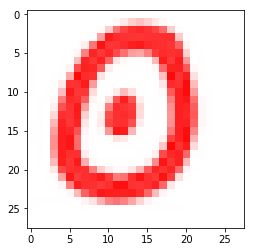

In [12]:
import matplotlib.image as mpimg
img_png = mpimg.imread("image_test/test (3).png")[0:28, 0:28, 0:3]
plt.imshow(img_png)

# normalize
img_png = np.average(img_png, axis=2)
# img_png = np.sum(img_png, axis=2)
# img_png = img_png/3
img_png = 1-img_png
img_png = img_png/img_png.max().max()

# print(img_png)

# plt.imshow(img_png, cmap = 'Greys')
print(f"model predict as {new_model.predict_classes(img_png.reshape(1,28,28,1))}")


model predict as [3]


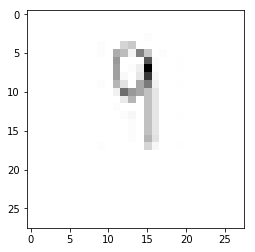

In [15]:
import matplotlib.image as mpimg
img_png = mpimg.imread("image_test/test (4).png")[0:28, 0:28, 0:3]

# normalize
img_png = np.average(img_png, axis=2)
img_png = 1-img_png
img_png = img_png/img_png.max().max()

plt.imshow(img_png, cmap = 'Greys')
print(f"model predict as {new_model.predict_classes(img_png.reshape(1,28,28,1))}")
# 可能太淡了，儘管normalize，還是太淡

model predict as [3]


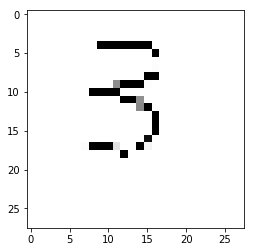

In [17]:
import matplotlib.image as mpimg
img_png = mpimg.imread("image_test/test (5).png")[0:28, 0:28, 0:3]
plt.imshow(img_png)

# normalize
img_png = np.average(img_png, axis=2)
img_png = 1-img_png
img_png = img_png/img_png.max().max()

print(f"model predict as {new_model.predict_classes(img_png.reshape(1,28,28,1))}")

model predict as [4]


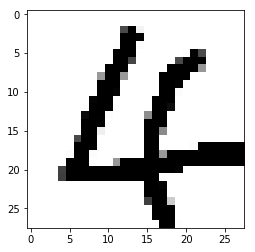

In [3]:
import matplotlib.image as mpimg
img_png = mpimg.imread("image_test/test (6).png")[0:28, 0:28, 0:3]
plt.imshow(img_png)

# normalize
img_png = np.average(img_png, axis=2)
img_png = 1-img_png
img_png = img_png/img_png.max().max()

print(f"model predict as {new_model.predict_classes(img_png.reshape(1,28,28,1))}")